In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# load boston housing dataset from sklearn.datasets and print it

from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
# dictionary 
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
# transforming dataset into dataframe 
# data = the data we want or independent variables also known as x values
# feature_names coloumn names of the data
# target = the target variable or the price of the houses or dependent variable or y values

df_x = pd.DataFrame(boston.data)
df_x

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [5]:
# since our dataset doesn't have column values we will provide the column values

df_x.columns = boston.feature_names
df_x

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [6]:
df_y = pd.DataFrame(boston.target)

In [7]:
# get some statistics from the dataset

df_x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
# initialize the linear regression model
reg = LinearRegression()

In [9]:
# splitting the data into 80% training and 20% testing

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=1)

In [10]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (404, 13)
x_test:  (102, 13)
y_train:  (404, 1)
y_test:  (102, 1)


In [11]:
# Train the model with our training data
reg.fit(x_train, y_train)

LinearRegression()

In [12]:
# Print the predictions on our test data
y_pred = reg.predict(x_test)
print(y_pred)

[[32.65503184]
 [28.0934953 ]
 [18.02901829]
 [21.47671576]
 [18.8254387 ]
 [19.87997758]
 [32.42014863]
 [18.06597765]
 [24.42277848]
 [27.00977832]
 [27.04081017]
 [28.75196794]
 [21.15677699]
 [26.85200196]
 [23.38835945]
 [20.66241266]
 [17.33082198]
 [38.24813601]
 [30.50550873]
 [ 8.74436733]
 [20.80203902]
 [16.26328126]
 [25.21805656]
 [24.85175752]
 [31.384365  ]
 [10.71311063]
 [13.80434635]
 [16.65930389]
 [36.52625779]
 [14.66750528]
 [21.12114902]
 [13.95558618]
 [43.16210242]
 [17.97539649]
 [21.80116017]
 [20.58294808]
 [17.59938821]
 [27.2212319 ]
 [ 9.46139365]
 [19.82963781]
 [24.30751863]
 [21.18528812]
 [29.57235682]
 [16.3431752 ]
 [19.31483171]
 [14.56343172]
 [39.20885479]
 [18.10887551]
 [25.91223267]
 [20.33018802]
 [25.16282007]
 [24.42921237]
 [25.07123258]
 [26.6603279 ]
 [ 4.56151258]
 [24.0818735 ]
 [10.88682673]
 [26.88926656]
 [16.85598381]
 [35.88704363]
 [19.55733853]
 [27.51928921]
 [16.58436103]
 [18.77551029]
 [11.13872875]
 [32.36392607]
 [36.72833

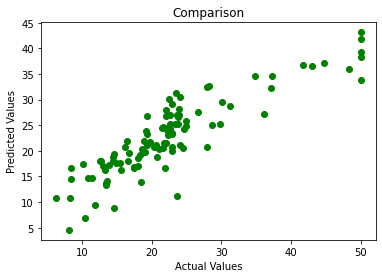

In [13]:
plt.scatter( y_test, y_pred, color='g')
plt.title('Comparison')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [15]:
# check the model performance/ acuracy  using the Mean Squared Error and sklearn.metrics

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("Accuracy of model: ", 100-mse,'%')

Mean Squared Error:  23.380836480270315
Accuracy of model:  76.61916351972968 %
